## Master Thesis

In [1]:
#Topic: ‘Quantitative Approach to Bankruptcy Prediction: Evidence from Machine Learning and Neural Networks’  
#Author: Norayr Hayruni
#Advisor: Prof. Ester Faia 
#Date: June, 2022

In [2]:
## In this part, we import, manipulate, describe and prepare the dataset for model building and training

In [3]:
# Standard libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv('data.csv')
data.shape

(6819, 96)

In [75]:
# Our dataset consists of 6819 obervations and 96 features at the initial stage

In [4]:
# Some descriptive statistics gives a quick picture of the nature of our dataset
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
# At the initial stage it is important to see check the presence of non-values in our dataset 
print(data.isna().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [6]:
# To make sure we see all the features, we can use list comprehension for a quick look
nan_check = [x for x in data if data[x].isna().sum() > 0]
nan_check

[]

In [7]:
# Assigning X and y
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

<IPython.core.display.Javascript object>


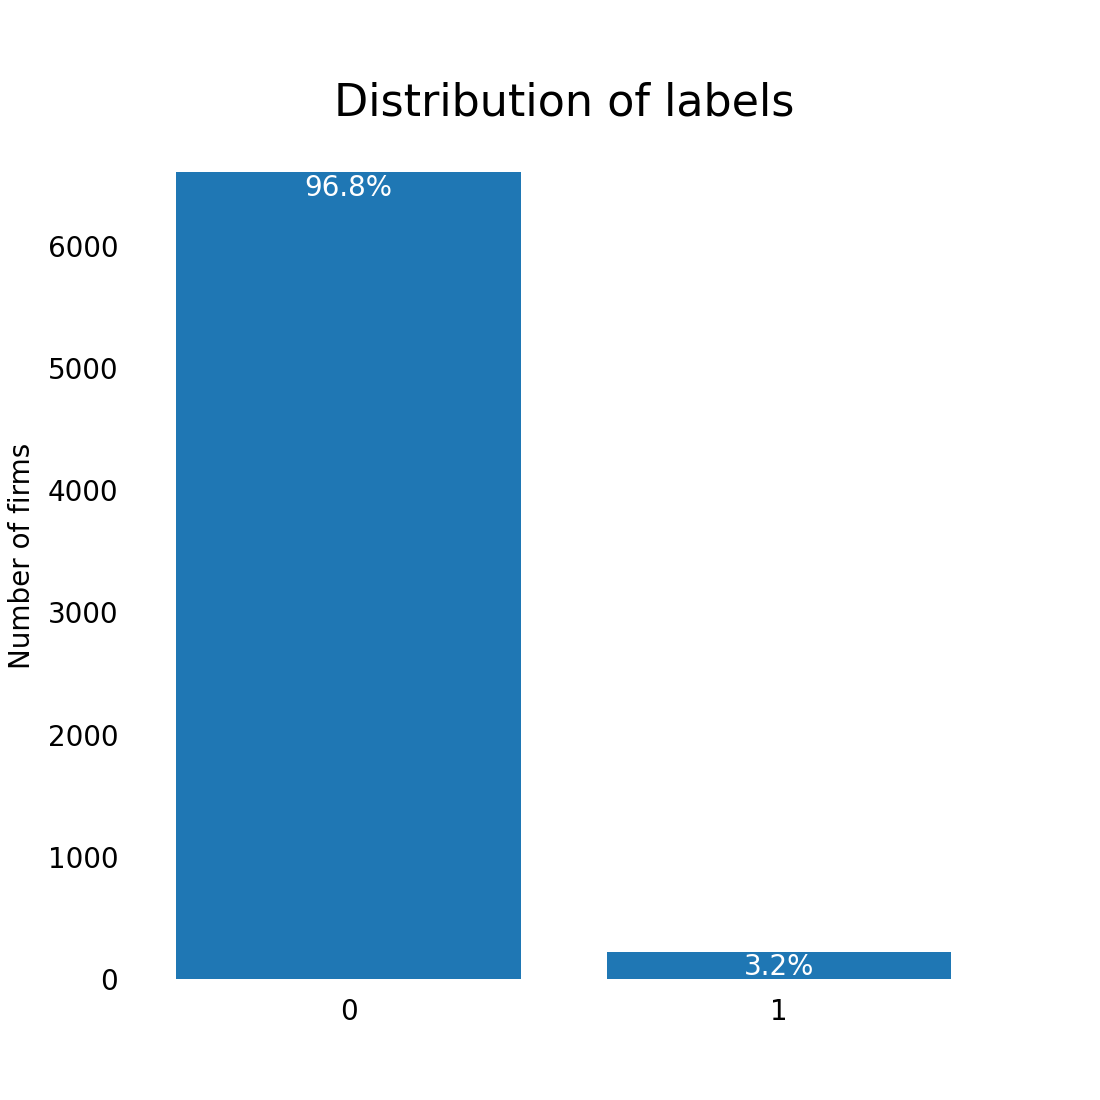

In [8]:
# Plotting bar for the target to check whether we have class imbalance issue
plt.figure(figsize=(5.5,5.5))
plt.bar(x = ['0', '1'], height=np.bincount(y), color='g')
plt.title('Distribution of labels', fontsize=16)
plt.ylabel('Number of firms')
# Remove tickers 
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
# remove the frame 
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Adding the percentage of each class into total 
bars = plt.bar(x = ['0', '1'], height=np.bincount(y))
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-190,
         str(round((bar.get_height() / np.bincount(y).sum()*100), 1)) + '%', ha='center', c='w', fontsize='medium')
#plt.savefig('class imb before resampling.png')
plt.show();

In [9]:
# From the above bar chart, wee see that only 3.2% of our observations lie in the minority class (bankruptcy cases),
# which indicates that we have a strong class imbalance. Later we should use several resampling techniques 
# to correct the imbalance before model training. 

<IPython.core.display.Javascript object>


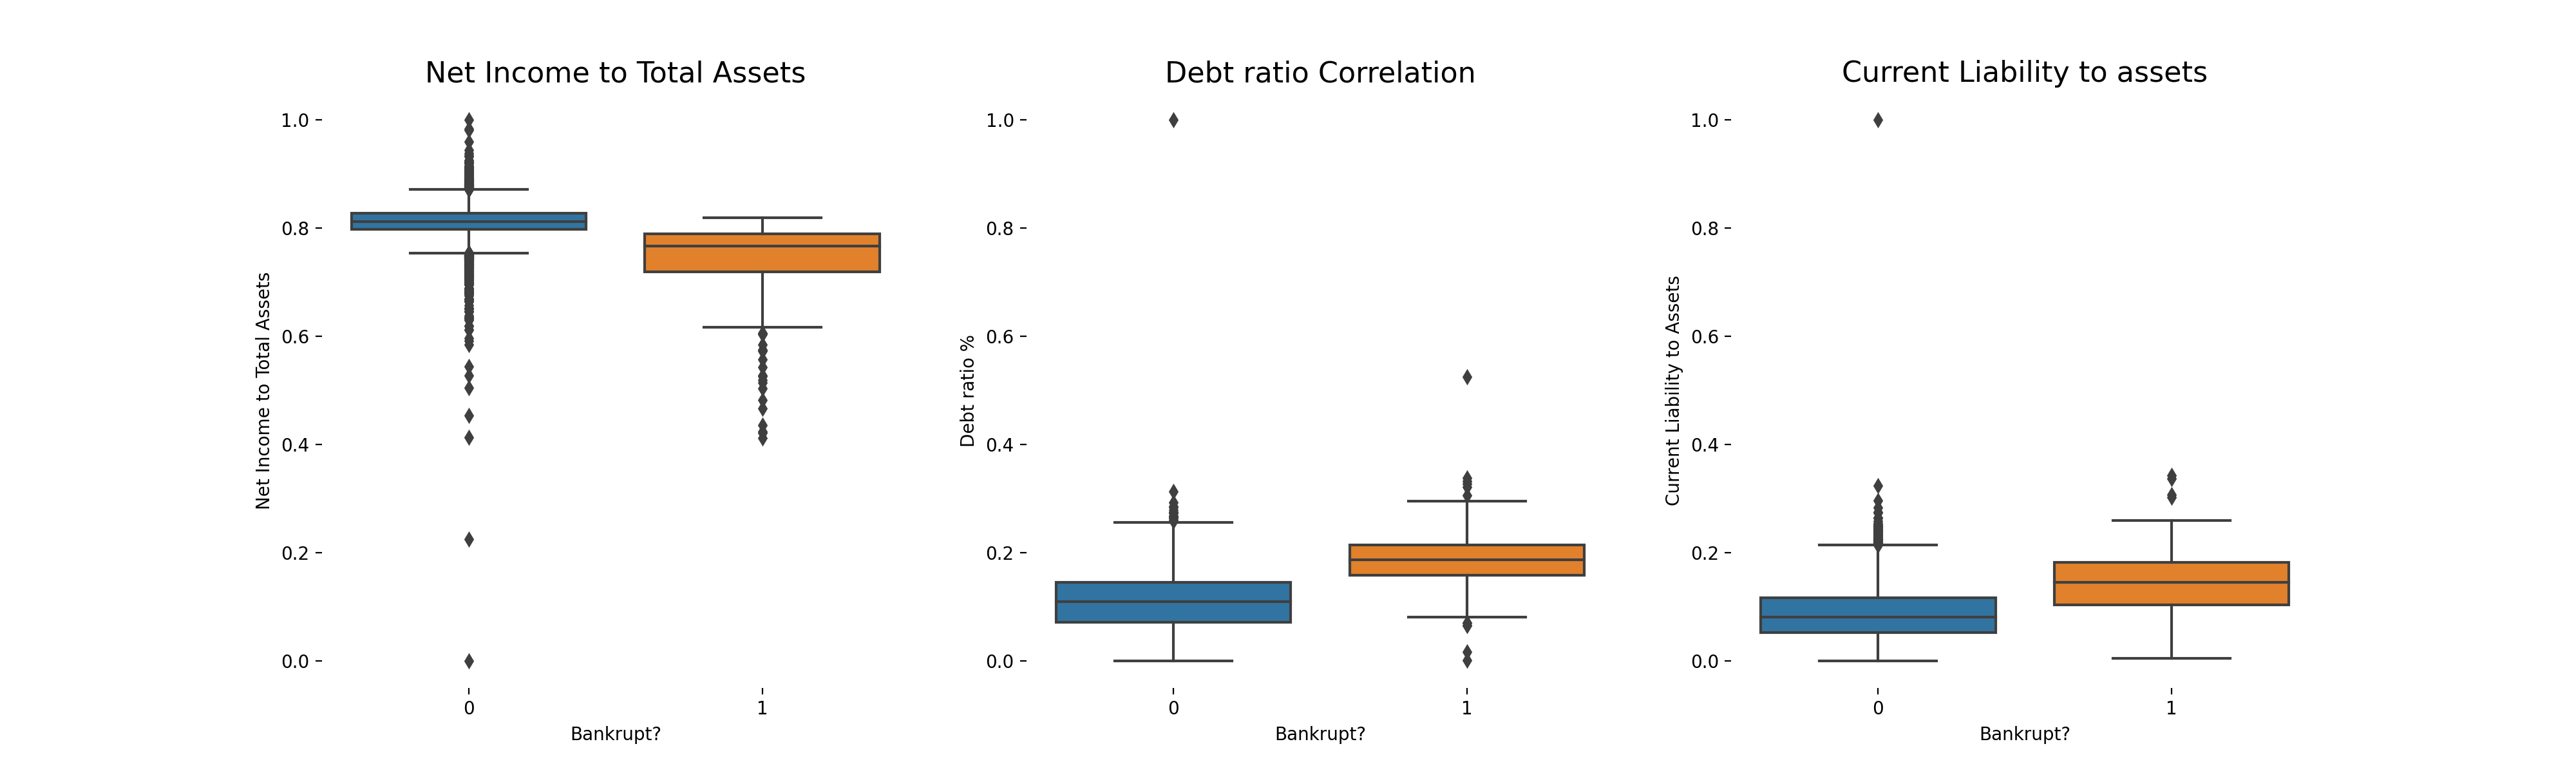

In [11]:
# Some Explainatory analsis 
import seaborn as sns 
# Stripping the columns names to eliminate the white space
data.rename(columns=lambda x: x.strip(), inplace=True)
# First some boxplots with debt variables 
y, ax = plt.subplots(ncols=3, figsize=(20,6))
ax[0].spines.right.set_visible(False)
ax[0].spines.left.set_visible(False)
ax[0].spines.top.set_visible(False)
ax[0].spines.bottom.set_visible(False)
    
sns.boxplot(x='Bankrupt?', y="Net Income to Total Assets", data=data, ax=ax[0])
ax[0].set_title('Net Income to Total Assets', fontsize =16)


sns.boxplot(x='Bankrupt?', y="Debt ratio %", data=data, ax=ax[1])
ax[1].set_title('Debt ratio Correlation', fontsize =16)
ax[1].spines.right.set_visible(False)
ax[1].spines.left.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].spines.bottom.set_visible(False)


sns.boxplot(x='Bankrupt?', y="Current Liability to Assets", data=data, ax=ax[2])
ax[2].set_title('Current Liability to assets', fontsize =16)
ax[2].spines.right.set_visible(False)
ax[2].spines.left.set_visible(False)
ax[2].spines.top.set_visible(False)
ax[2].spines.bottom.set_visible(False)
#plt.savefig('describte stat.png')

plt.show();

In [12]:
# From the above box plots we see that, for example the average ROA (Net Income to Total Assets) is higher for 
# non bankrupt firms than for bankrupt firms. In addition, we see that the current liabaility to assets ratio is 
# lower for non-bankrupt firms than for bankrupt firms. The plots make easily sense.

<IPython.core.display.Javascript object>


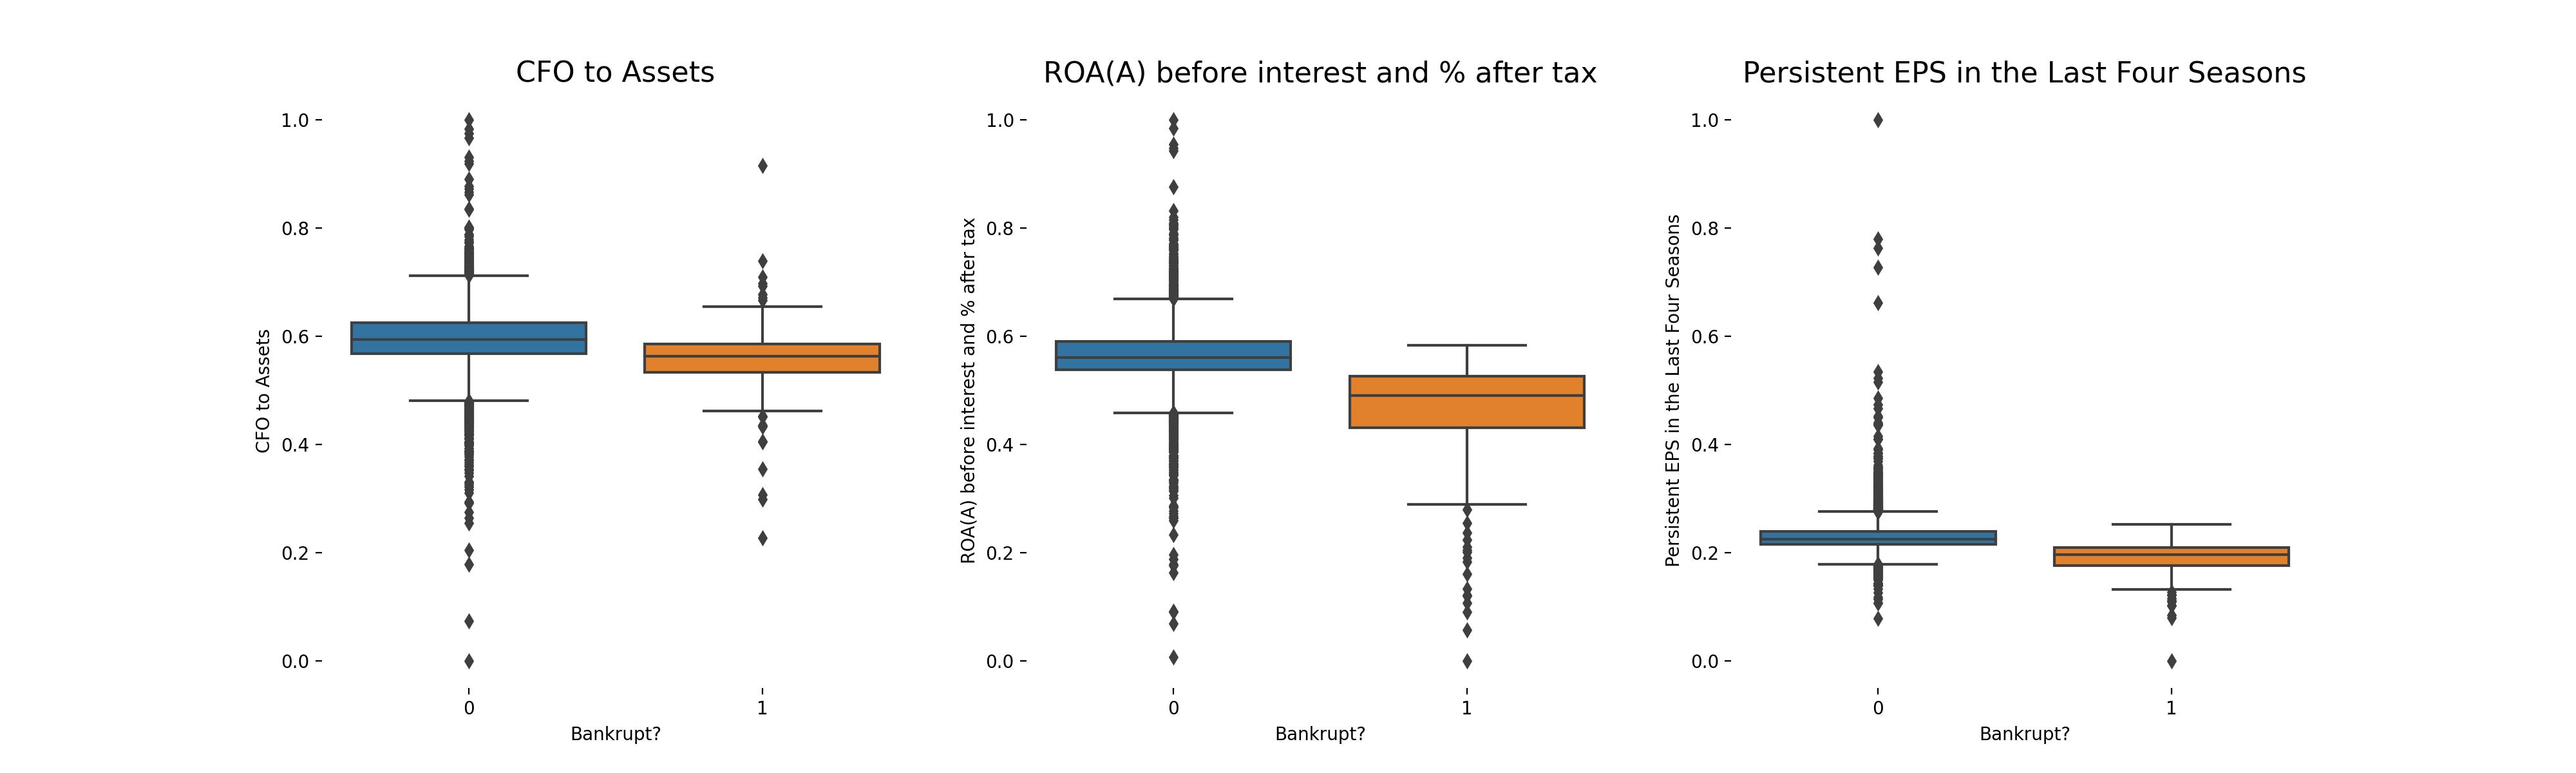

In [14]:
# More boxplots 
y, ax = plt.subplots(ncols = 3, figsize = (20,6))

sns.boxplot(x = 'Bankrupt?', y = 'CFO to Assets', data=data, ax = ax[0])
ax[0].set_title('CFO to Assets', fontsize =16)
ax[0].spines.right.set_visible(False)
ax[0].spines.left.set_visible(False)
ax[0].spines.top.set_visible(False)
ax[0].spines.bottom.set_visible(False)

sns.boxplot(x = 'Bankrupt?', y = 'ROA(A) before interest and % after tax', data=data, ax = ax[1])
ax[1].set_title('ROA(A) before interest and % after tax', fontsize =16)
ax[1].spines.right.set_visible(False)
ax[1].spines.left.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].spines.bottom.set_visible(False)

sns.boxplot(x = 'Bankrupt?', y = 'Persistent EPS in the Last Four Seasons', data = data, ax = ax[2])
ax[2].set_title('Persistent EPS in the Last Four Seasons', fontsize =16)
ax[2].spines.right.set_visible(False)
ax[2].spines.left.set_visible(False)
ax[2].spines.top.set_visible(False)
ax[2].spines.bottom.set_visible(False)

#plt.savefig('desc stat1')
plt.show();

In [15]:
# In this part, two well known resampling techniques (SMOTE and ADASYN) will be utilized to correct 
# the imbalance in the target variable. It is worth mentioning, that these techniques are oversampling techniques. 
# Due to the fact that the minority class is too small, undersampling techniques won't be considered.

# Let's first split the dataset into training and testing sets. It is highly essential to do that, 
# before using any resampling techniques. We must make sure that the resampling is applied only to the training 
# set, thus for model traning purposes. But the test should should be left untouched, since that is what 
# represents the real world.

# Assigning X and y
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# Resample 
from imblearn.over_sampling import SMOTE, ADASYN
X_train_sm, y_train_sm = SMOTE().fit_resample(X_train, y_train)
X_train_ad, y_train_ad  = ADASYN().fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>


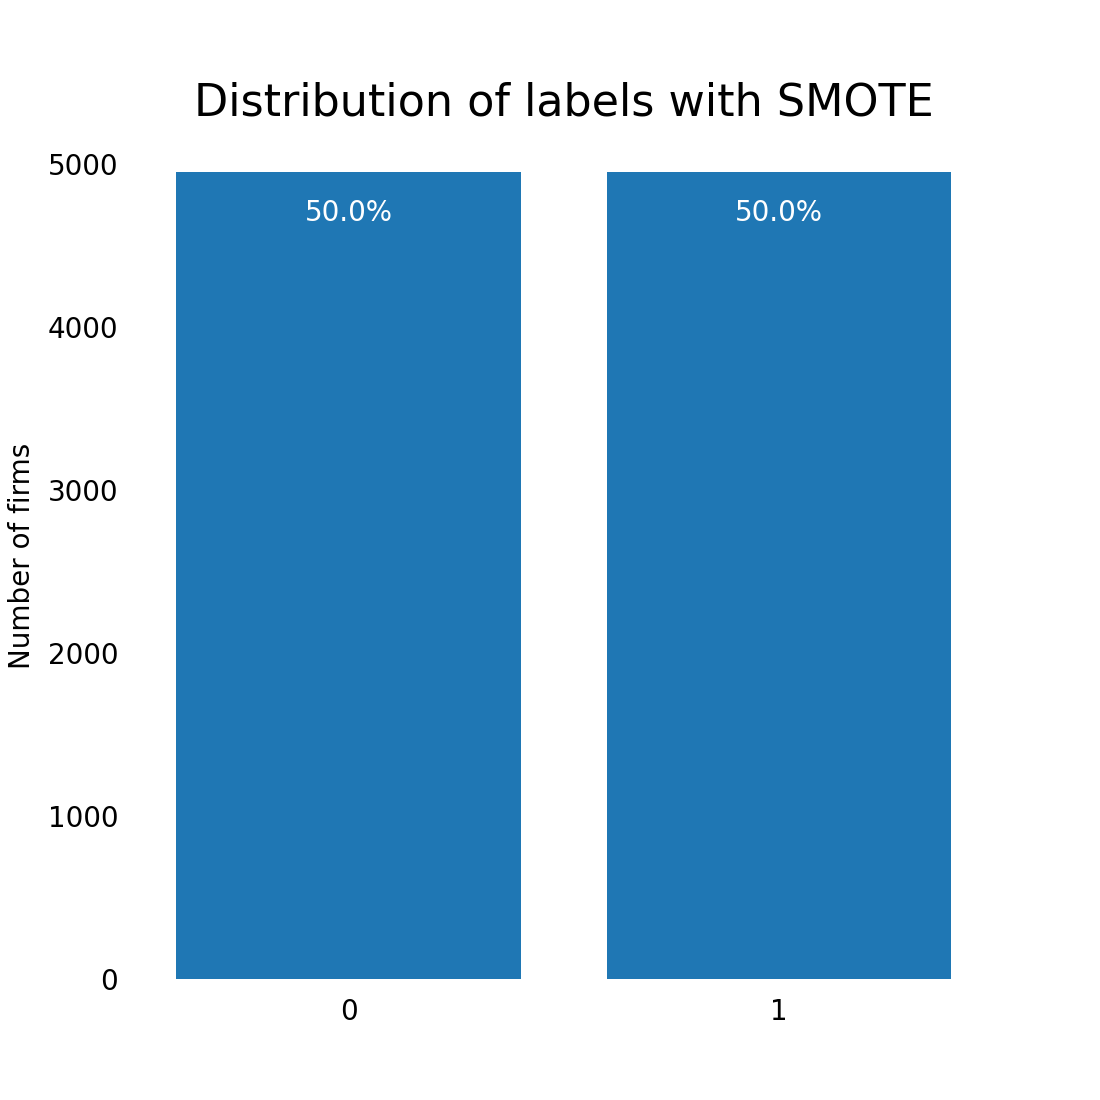

In [16]:
# Plotting bar for the target to check whether we have class imbalance issue
plt.figure(figsize=(5.5,5.5))
plt.bar(x = ['0', '1'], height=np.bincount(y_train_sm), color='g')
plt.title('Distribution of labels with SMOTE', fontsize=16)
plt.ylabel('Number of firms')
# Remove tickers 
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
# remove the frame 
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Adding the percentage of each class into total 
bars = plt.bar(x = ['0', '1'], height=np.bincount(y_train_sm))
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-300,
         str(round((bar.get_height() / np.bincount(y_train_sm).sum()*100), 1)) + '%', ha='center', c='w', fontsize='medium')
#plt.savefig('class imb with SMOTE.png')
plt.show();

<IPython.core.display.Javascript object>


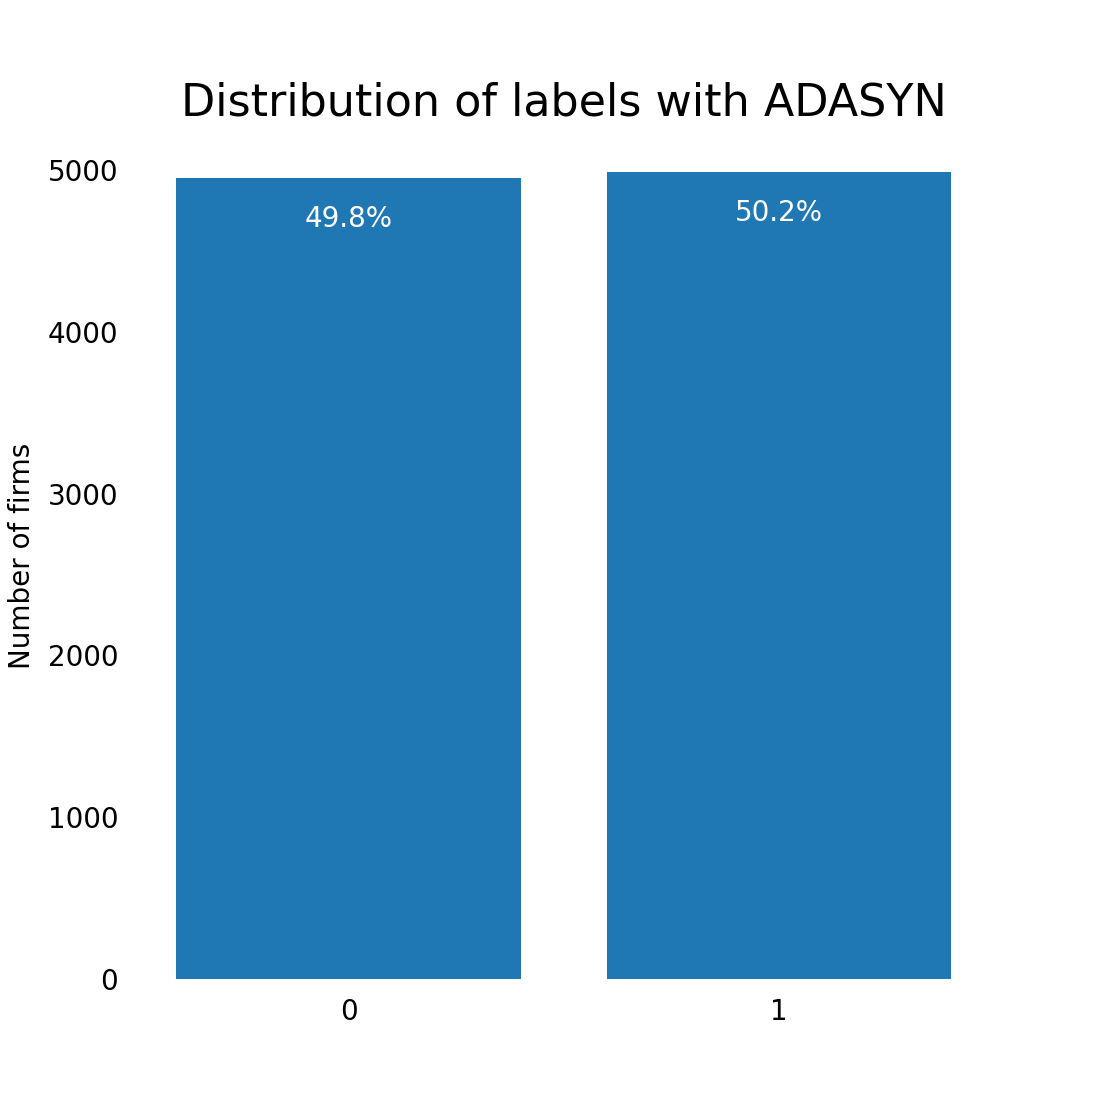

In [17]:
# Plotting bar for the target to check whether we have class imbalance issue
plt.figure(figsize=(5.5,5.5))
plt.bar(x = ['0', '1'], height=np.bincount(y_train_ad), color='g')
plt.title('Distribution of labels with ADASYN', fontsize=16)
plt.ylabel('Number of firms')
# Remove tickers 
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
# remove the frame 
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Adding the percentage of each class into total 
bars = plt.bar(x = ['0', '1'], height=np.bincount(y_train_ad))
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-300,
         str(round((bar.get_height() / np.bincount(y_train_ad).sum()*100), 1)) + '%', ha='center', c='w', fontsize='medium')
#plt.savefig('class imb with ADASYN.png')
plt.show();

In [19]:
# From the above two bar charts, we see the results of oversampling the class label using SMOTE and ADASYN 
# techniques respectively. In what follows (Part 2,3,4,5), we start to develop and train our models.